In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
rng = np.random.default_rng(seed=42)

In [3]:
centers = np.array([
    [0.0, 0.0],     # class 0 center
    [3.0, 0.0],     # class 1 center
    [1.5, 2.5],     # class 2 center
])

In [4]:
points = []
labels = []
num_points = 100

for cls, center in enumerate(centers):
	pts = rng.normal(loc=center, scale=0.5, size=(num_points, len(center)))
	lbs = np.full(num_points, cls)
	points.append(pts)
	labels.append(lbs)


In [5]:
print(points)

[array([[ 0.15235854, -0.51999205],
       [ 0.3752256 ,  0.47028236],
       [-0.97551759, -0.65108975],
       [ 0.0639202 , -0.1581213 ],
       [-0.00840058, -0.42652196],
       [ 0.43969899,  0.38889597],
       [ 0.03301535,  0.5636206 ],
       [ 0.23375467, -0.42964623],
       [ 0.18437539, -0.4794413 ],
       [ 0.43922515, -0.02496296],
       [-0.09243118, -0.34046477],
       [ 0.61127067, -0.07726474],
       [-0.21416391, -0.17606678],
       [ 0.26615459,  0.18272203],
       [ 0.20636631,  0.2154105 ],
       [ 1.0708238 , -0.20320751],
       [-0.25612136, -0.40688636],
       [ 0.30798971,  0.56448615],
       [-0.05697373, -0.42007824],
       [-0.41224061,  0.32529639],
       [ 0.37162709,  0.27157713],
       [-0.33275485,  0.11608066],
       [ 0.0583429 ,  0.1093443 ],
       [ 0.43571439,  0.11179777],
       [ 0.33945678,  0.03378953],
       [ 0.1445597 ,  0.31564411],
       [-0.72857791, -0.15983561],
       [-0.23518633, -0.31943892],
       [-0.13757113

In [6]:
X = np.vstack(points)   # shape (15, 2)
y = np.concatenate(labels)  # shape (15,)

In [7]:
print("X =", X)
print("y =", y)
print("X shape:", X.shape)
print("y shape:", y.shape)

X = [[ 1.52358540e-01 -5.19992053e-01]
 [ 3.75225598e-01  4.70282358e-01]
 [-9.75517594e-01 -6.51089753e-01]
 [ 6.39202016e-02 -1.58121296e-01]
 [-8.40057875e-03 -4.26521964e-01]
 [ 4.39698987e-01  3.88895968e-01]
 [ 3.30153488e-02  5.63620603e-01]
 [ 2.33754671e-01 -4.29646231e-01]
 [ 1.84375392e-01 -4.79441300e-01]
 [ 4.39225151e-01 -2.49629555e-02]
 [-9.24311818e-02 -3.40464772e-01]
 [ 6.11270669e-01 -7.72647410e-02]
 [-2.14163911e-01 -1.76066775e-01]
 [ 2.66154593e-01  1.82722032e-01]
 [ 2.06366306e-01  2.15410502e-01]
 [ 1.07082380e+00 -2.03207508e-01]
 [-2.56121365e-01 -4.06886364e-01]
 [ 3.07989711e-01  5.64486146e-01]
 [-5.69737288e-02 -4.20078238e-01]
 [-4.12240608e-01  3.25296394e-01]
 [ 3.71627086e-01  2.71577134e-01]
 [-3.32754854e-01  1.16080662e-01]
 [ 5.83429046e-02  1.09344298e-01]
 [ 4.35714389e-01  1.11797774e-01]
 [ 3.39456782e-01  3.37895347e-02]
 [ 1.44559699e-01  3.15644113e-01]
 [-7.28577910e-01 -1.59835608e-01]
 [-2.35186327e-01 -3.19438924e-01]
 [-1.37571126e-0

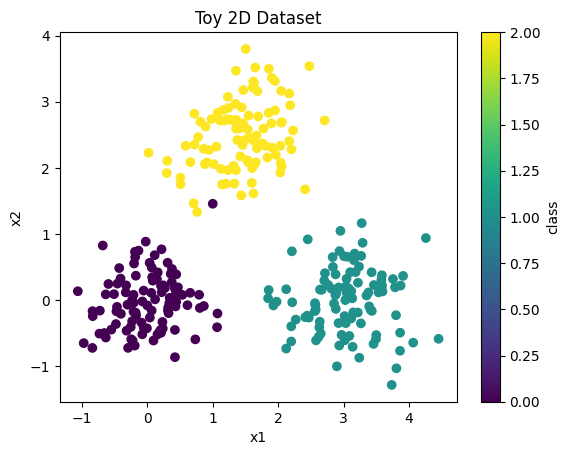

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Toy 2D Dataset")
plt.colorbar(label="class")
plt.show()

In [9]:
X_t = torch.tensor(X, dtype=torch.float32)

In [10]:
print(X_t)
print("X_t shape:", X_t.shape)
print("X_t dtype:", X_t.dtype)

tensor([[ 1.5236e-01, -5.1999e-01],
        [ 3.7523e-01,  4.7028e-01],
        [-9.7552e-01, -6.5109e-01],
        [ 6.3920e-02, -1.5812e-01],
        [-8.4006e-03, -4.2652e-01],
        [ 4.3970e-01,  3.8890e-01],
        [ 3.3015e-02,  5.6362e-01],
        [ 2.3375e-01, -4.2965e-01],
        [ 1.8438e-01, -4.7944e-01],
        [ 4.3923e-01, -2.4963e-02],
        [-9.2431e-02, -3.4046e-01],
        [ 6.1127e-01, -7.7265e-02],
        [-2.1416e-01, -1.7607e-01],
        [ 2.6615e-01,  1.8272e-01],
        [ 2.0637e-01,  2.1541e-01],
        [ 1.0708e+00, -2.0321e-01],
        [-2.5612e-01, -4.0689e-01],
        [ 3.0799e-01,  5.6449e-01],
        [-5.6974e-02, -4.2008e-01],
        [-4.1224e-01,  3.2530e-01],
        [ 3.7163e-01,  2.7158e-01],
        [-3.3275e-01,  1.1608e-01],
        [ 5.8343e-02,  1.0934e-01],
        [ 4.3571e-01,  1.1180e-01],
        [ 3.3946e-01,  3.3790e-02],
        [ 1.4456e-01,  3.1564e-01],
        [-7.2858e-01, -1.5984e-01],
        [-2.3519e-01, -3.194

In [11]:
y_t = torch.tensor(y, dtype=torch.long)

In [12]:
print(y_t)
print("y_t shape:", y_t.shape)
print("y_t dtype:", y_t.dtype)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [13]:
N = X.shape[0]
perm = rng.permutation(np.arange(N))
split = int(0.8 * N)
train_idx = perm[:split]
test_idx = perm[split:]

In [14]:
print("Train idx:", train_idx)
print("Test idx:", test_idx)

Train idx: [ 16 100 129 152  81 289 222 286 138 194 290 209  33 146  20 235  85 135
 172  79 233 134 111  19  53  23 212 262 268  44  66 162 169 263 122 185
 118 128 283 107 181 295 284 271 230  57 174 143 116  32  83  69 109 299
 133 158  86  43  60 229  56 130 131 285 164 203 103 240  45  50 187  77
 142 261 272 216 246 198  37 168 273 104 173 148 153 288  70   4 220 249
  65   9 213 223  96  59 204 124  30 156  36 292  63  68 296 190 165   5
 242 157  61 171 127  41  64 257 155  92 238  47  29 244 251  42 291 150
   2 258 227  49 119 274 248 179 176 145 108  89 144 278  97 259 276  82
 232 167 211 287 267  75 180 189  87 228 206   0  25 252 208 241  14 297
 163 132  88 112 205  71 266 120 183   8  10 151  18 140  73 170 136  51
 193  31 239 149 293 245  94  27 139 243 281  72 264 115 178 207 196 114
  54 110  38 234 192  78   3 270 147 113 191 161 226  28 218  11 256 184
  84 282 231  67  40 200 275 202 141  21 236 237 106 214  46 182 247 294
 166 186 219  17 177   1]
Test idx: [ 80

In [15]:
X_train = X_t[train_idx]
y_train = y_t[train_idx]

X_test = X_t[test_idx]
y_test = y_t[test_idx]

In [16]:
class SmallNet(nn.Module):
	def __init__(self):
		super().__init__()
		self.layer1 = nn.Linear(2, 32)
		self.relu = nn.ReLU()
		self.layer2 = nn.Linear(32, 3)


	def forward(self, x):
		x = self.layer1(x)
		x = self.relu(x)
		x = self.layer2(x)
		return x

In [17]:
model = SmallNet()

In [18]:
output = model(X_train)

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [20]:
for epoch in range(200):
    optimizer.zero_grad()      

    output = model(X_train)        
    loss = criterion(output, y_train)

    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 1.1415
Epoch 20, Loss: 0.1240
Epoch 40, Loss: 0.0343
Epoch 60, Loss: 0.0222
Epoch 80, Loss: 0.0176
Epoch 100, Loss: 0.0155
Epoch 120, Loss: 0.0142
Epoch 140, Loss: 0.0134
Epoch 160, Loss: 0.0126
Epoch 180, Loss: 0.0119


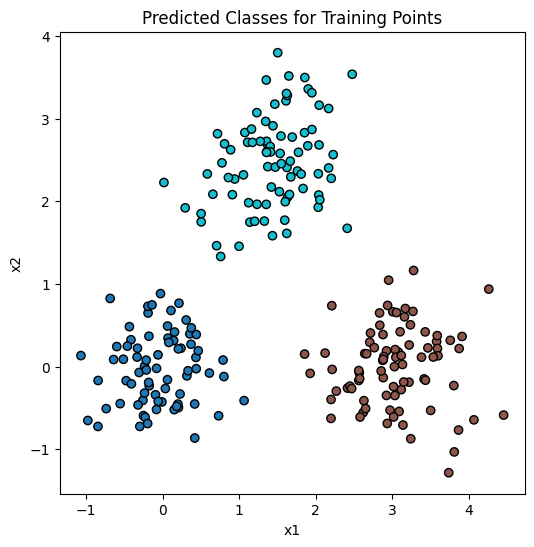

In [22]:
model.eval()
with torch.no_grad():
    pred_train = model(X_train).argmax(dim=1)

plt.figure(figsize=(6,6))

plt.scatter(X_train[:,0], X_train[:,1], c=pred_train, cmap="tab10", edgecolors="k")
plt.title("Predicted Classes for Training Points")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()



In [27]:
model.eval()
with torch.no_grad():
    logits = model(X_train)

In [31]:
def compute_margins(logits):
	top2 = torch.topk(logits, k=2, dim=1).values
	return top2[:,0] - top2[:,1]

In [32]:
print(logits)

tensor([[  8.1562,  -4.9676,  -5.4576],
        [ -6.2349,   6.7879,  -3.9223],
        [ -5.1311,   9.4423, -10.0204],
        [ -5.3901,   9.4527,  -9.3792],
        [  3.6530,   0.1726,  -5.7873],
        [ -2.4684,  -4.9957,   7.1457],
        [ -0.0827,  -3.2351,   3.6015],
        [ -1.1733,  -3.3534,   4.6816],
        [ -3.7942,   7.9311,  -8.8547],
        [ -5.9838,  10.3391, -10.5228],
        [  0.1121,  -5.6088,   4.7677],
        [ -3.5214,  -5.8181,   8.8263],
        [  7.6001,  -4.5232,  -4.8992],
        [ -8.0193,  13.3292, -14.2044],
        [  5.3393,  -2.7226,  -2.6040],
        [ -1.7906,  -3.7441,   5.5270],
        [  6.1652,  -4.6882,  -3.1115],
        [ -4.3372,   6.8282,  -5.4715],
        [ -8.5103,  13.4304, -13.2528],
        [  8.5361,  -5.1677,  -5.9930],
        [ -4.0661,  -6.5584,   9.9544],
        [ -6.1204,   9.0486,  -6.9635],
        [ -5.8816,   9.9772,  -9.6918],
        [  5.8120,  -4.8957,  -2.6451],
        [  7.5639,  -5.3550,  -4.6825],


In [34]:
margins = compute_margins(logits)

In [35]:
sorted_margins, indices = torch.sort(margins)

In [39]:
boundary_points = X_train[indices[:20]]
boundary_labels = y_train[indices[:20]]

print("Boundary points:\n", boundary_points)
print("Their labels:\n", boundary_labels)


Boundary points:
 tensor([[ 0.7589,  1.3332],
        [ 0.9984,  1.4569],
        [ 0.7052,  1.4635],
        [ 1.4345,  1.5845],
        [ 1.6208,  1.6125],
        [ 1.1403,  1.7487],
        [ 1.0642, -0.4107],
        [ 2.4106,  1.6741],
        [ 1.2028,  1.7597],
        [ 1.3286,  1.7616],
        [ 0.5046,  1.7525],
        [-0.0269,  0.8840],
        [ 1.8544,  0.1522],
        [ 1.5949,  1.7726],
        [ 2.2092,  0.7380],
        [ 0.5035,  1.8518],
        [ 0.2144,  0.7679],
        [ 0.2950,  1.9218],
        [ 1.3531,  1.9639],
        [ 1.2330,  1.9651]])
Their labels:
 tensor([2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 2, 2, 2])


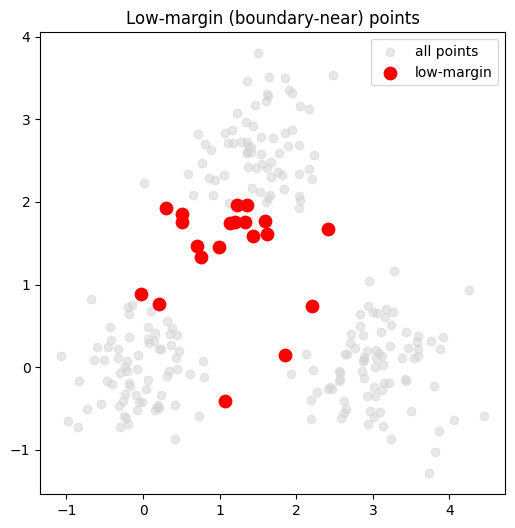

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(X_train[:,0], X_train[:,1], c='lightgray', alpha=0.5, label='all points')
plt.scatter(boundary_points[:,0], boundary_points[:,1], c='red', s=80, label='low-margin')
plt.legend()
plt.title("Low-margin (boundary-near) points")
plt.show()

In [59]:
# sample points in the bounding box of your dataset
xmin, xmax = X_train[:,0].min(), X_train[:,0].max()
ymin, ymax = X_train[:,1].min(), X_train[:,1].max()

X_attacker = torch.rand(5000, 2)
X_attacker[:,0] = X_attacker[:,0] * (xmax - xmin) + xmin
X_attacker[:,1] = X_attacker[:,1] * (ymax - ymin) + ymin

In [60]:
model.eval()
with torch.no_grad():
    y_attacker = model(X_attacker).argmax(dim=1)

In [61]:
stolen_model = SmallNet()
optimizer_s = optim.Adam(stolen_model.parameters(), lr=0.01)
criterion_s = nn.CrossEntropyLoss()

In [62]:
for epoch in range(200):
    optimizer_s.zero_grad()
    logits_s = stolen_model(X_attacker)
    loss_s = criterion_s(logits_s, y_attacker)
    loss_s.backward()
    optimizer_s.step()

    if epoch % 50 == 0:
        print(f"Stolen model loss: {loss_s.item():.4f}")

Stolen model loss: 1.0305
Stolen model loss: 0.1317
Stolen model loss: 0.0745
Stolen model loss: 0.0531


In [63]:
stolen_model.eval()
with torch.no_grad():
    logits_stolen = stolen_model(boundary_points)

In [64]:
margins_stolen = compute_margins(logits_stolen)
print("Stolen margins:", margins_stolen)

Stolen margins: tensor([1.6263, 3.7241, 2.9479, 6.0760, 6.6378, 7.1763, 3.2895, 4.1258, 7.3756,
        7.5842, 5.6412, 5.7316, 4.0951, 8.0505, 5.5182, 6.6642, 6.5657, 6.7796,
        9.5436, 9.3725])


In [65]:
print("Original margins:", margins[indices[:20]])
print("Stolen margins:  ", margins_stolen)


Original margins: tensor([0.6464, 1.3983, 1.6359, 2.8665, 3.3543, 3.4462, 3.4804, 3.4857, 3.4871,
        3.6842, 3.7175, 4.0190, 4.1065, 4.2164, 4.3651, 4.4475, 4.6206, 4.6556,
        4.8926, 4.9778])
Stolen margins:   tensor([1.6263, 3.7241, 2.9479, 6.0760, 6.6378, 7.1763, 3.2895, 4.1258, 7.3756,
        7.5842, 5.6412, 5.7316, 4.0951, 8.0505, 5.5182, 6.6642, 6.5657, 6.7796,
        9.5436, 9.3725])


In [66]:
distance = torch.mean(torch.abs(margins[indices[:20]] - margins_stolen))
print("Mean absolute margin difference:", float(distance))

Mean absolute margin difference: 2.371352434158325
